In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *

In [3]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [4]:
value_function_employment(model.par, model.par.w, -1 )

11.115792447355036

In [5]:
unemployed_ss(model.par,1)

(0.03820114768663136, -245.3463189570018)

In [6]:
search_effort = solve_search_effort(model.par)
print(np.shape(search_effort))


(2, 49)


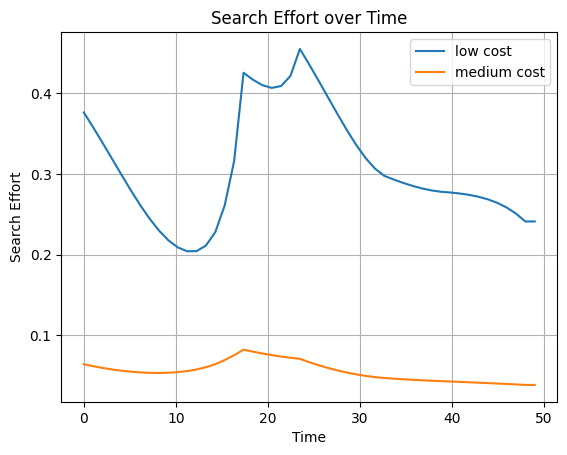

In [7]:

time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
sim = sim_search_effort(model.par)

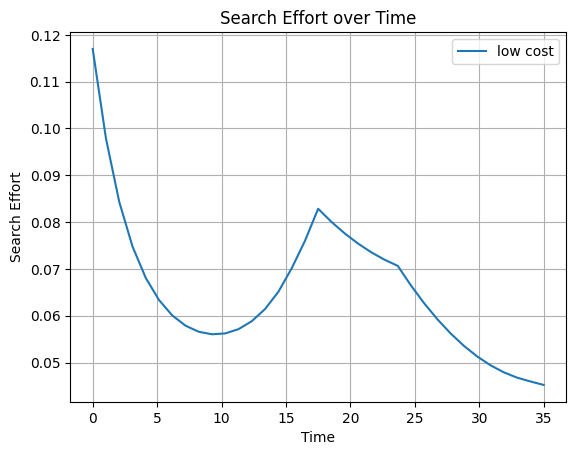

In [9]:
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, label = 'low cost') 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
from estimation import *

In [11]:
est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)


/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/hand_to_mouth.py:66: RuntimeWarning: invalid value encountered in scalar add
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])


In [12]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.041, 1.926, 363.974, 363.972
Number of iterations:    478


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


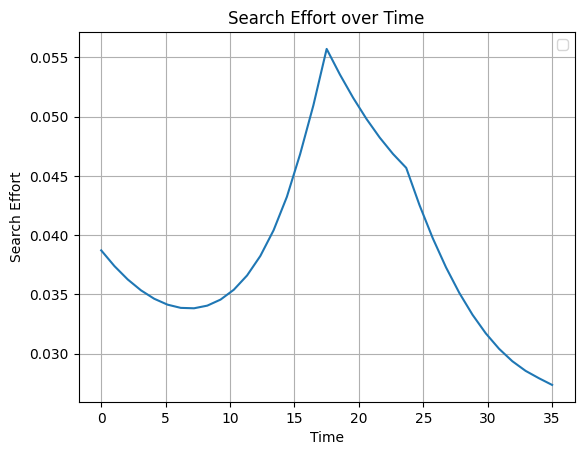

In [13]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()
